In [1]:
import cv2
import numpy as np

In [2]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Populating the interactive namespace from numpy and matplotlib


In [3]:
pylab.rcParams['figure.figsize'] = (20, 12)

In [65]:
#image_file = 'car-insurance-tool/analyze_images/20170806_130330/frame_001.png'
image_file = 'car-insurance-tool/analyze_images/20170806_130330/frame_047.png'
#image_file = 'car-insurance-tool/analyze_images/20170806_130239/frame_001.png'

In [66]:
image = cv2.imread(image_file)

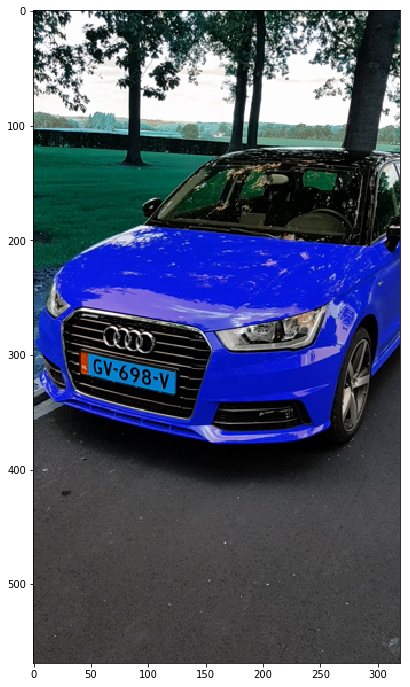

In [67]:
imgplot = plt.imshow(image)
plt.show()

In [55]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.bilateralFilter(gray, 11, 17, 17)
edged = cv2.Canny(gray, 30, 200)

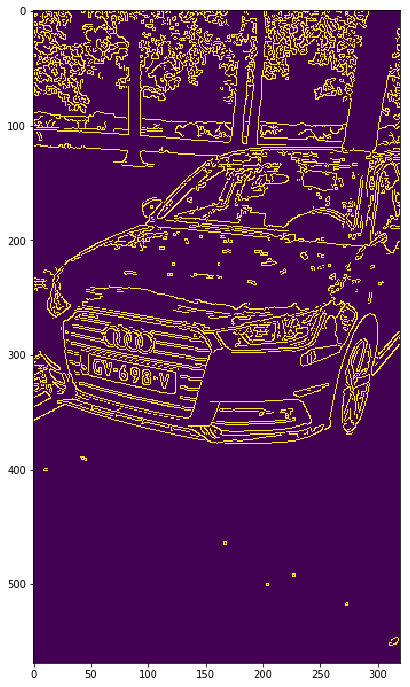

In [56]:
imgplot = plt.imshow(edged)
plt.show()

In [68]:
cv2.imwrite('images_for_demo/edged.png', edged)

True

In [57]:
# find contours in the edged image, keep only the largest
# ones, and initialize our screen contour
(_,cnts, _) = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)
screenCnt = None

In [58]:
# loop over our contours
for c in cnts:
    # approximate the contour
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
 
    # if our approximated contour has four points, then
    # we can assume that we have found our screen
    if len(approx) == 4:
        screenCnt = approx
        break
        
if len(screenCnt) != 4:
    print("not found")

In [59]:
screenCnt

array([[[ 48, 300]],

       [[121, 314]],

       [[124, 332]],

       [[ 49, 318]]], dtype=int32)

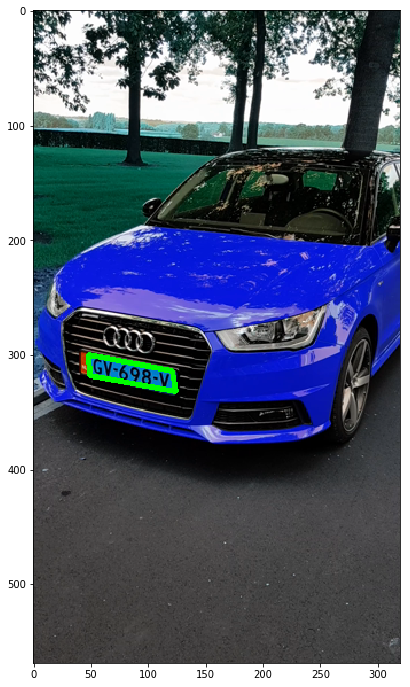

In [60]:
img_copy = image.copy()
cv2.drawContours(img_copy, [screenCnt], -1, (0, 255, 0), 3)
imgplot = plt.imshow(img_copy)
plt.show()

In [69]:
cv2.imwrite('images_for_demo/detected.png', img_copy)

True

In [61]:
pts = screenCnt.reshape(4, 2)
rect = np.zeros((4, 2), dtype = "float32")
 
# the top-left point has the smallest sum whereas the
# bottom-right has the largest sum
s = pts.sum(axis = 1)
rect[0] = pts[np.argmin(s)]
rect[2] = pts[np.argmax(s)]
 
# compute the difference between the points -- the top-right
# will have the minumum difference and the bottom-left will
# have the maximum difference
diff = np.diff(pts, axis = 1)
rect[1] = pts[np.argmin(diff)]
rect[3] = pts[np.argmax(diff)]
 
# multiply the rectangle by the original ratio
#rect *= ratio


In [62]:
# now that we have our rectangle of points, let's compute
# the width of our new image
(tl, tr, br, bl) = rect
widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
 
# ...and now for the height of our new image
heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
 
# take the maximum of the width and height values to reach
# our final dimensions
maxWidth = max(int(widthA), int(widthB))
maxHeight = max(int(heightA), int(heightB))
 
# construct our destination points which will be used to
# map the screen to a top-down, "birds eye" view
dst = np.array([
	[0, 0],
	[maxWidth - 1, 0],
	[maxWidth - 1, maxHeight - 1],
	[0, maxHeight - 1]], dtype = "float32")
 
# calculate the perspective transform matrix and warp
# the perspective to grab the screen
M = cv2.getPerspectiveTransform(rect, dst)
warp = cv2.warpPerspective(image, M, (maxWidth, maxHeight))

In [63]:
margin = 20
warp_padded = cv2.copyMakeBorder(warp, margin, margin, margin, margin, cv2.BORDER_CONSTANT)

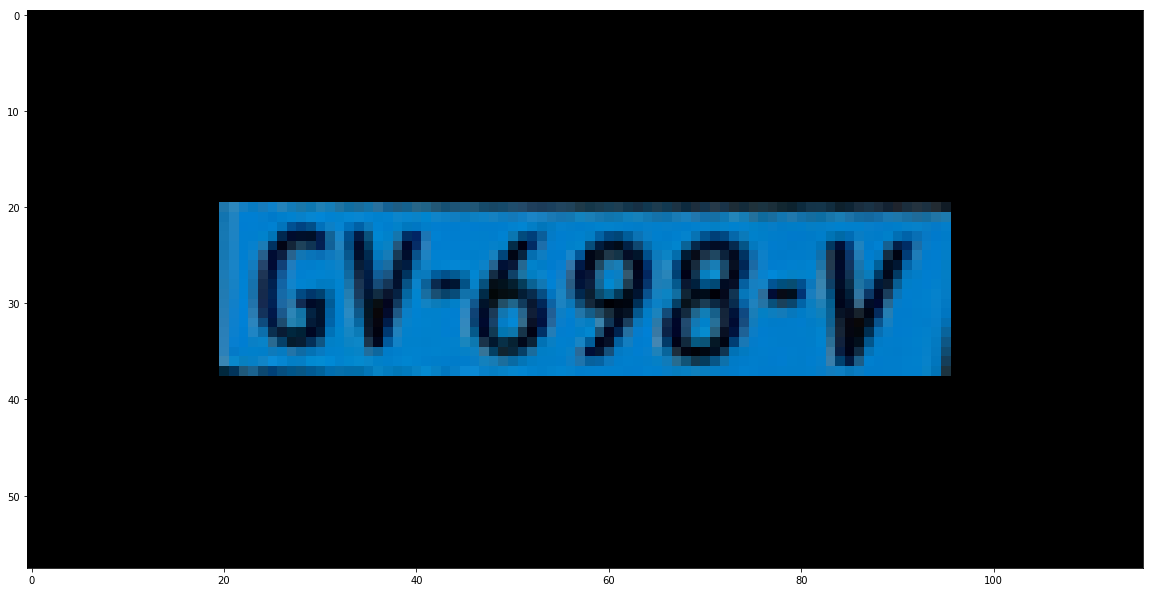

In [64]:
imgplot = plt.imshow(warp_padded)
plt.show()

In [228]:
cv2.imwrite('warped.png',warp_padded)

True

In [70]:
cv2.imwrite('images_for_demo/warped.png', warp_padded)

True

In [190]:
warp.shape

(16, 93, 3)

In [191]:
ratio = 19/75.0

In [19]:
np.zeros((warp.shape[0]*5, warp.shape[1]*5, 3)

SyntaxError: unexpected EOF while parsing (<ipython-input-19-8df6b4ee740e>, line 1)

In [21]:
pts1

array([[ 1.,  1.],
       [ 2.,  2.],
       [ 3.,  3.],
       [ 4.,  4.]], dtype=float32)

In [22]:
screenCnt[:,0]

array([[ 61, 184],
       [160, 201],
       [164, 223],
       [ 65, 206]], dtype=int32)

In [18]:
pts1[:,0], pts2

(array([[ 61, 184],
        [160, 201],
        [164, 223],
        [ 65, 206]], dtype=int32), array([[ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.]], dtype=float32))

In [ ]:
rows,cols,ch = image.shape
height = bottom_left[1] - top_left[1]  
width = top_right[0] - top_left[0]

pts1 = np.float32([top_left, top_right, bottom_left, bottom_right])
pts2 = np.float32([[0,0],[width, 0],[0, height],[width,height]])

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(image,M,(width,height))


In [148]:
lower, upper = ([0, 146, 190], [62, 212, 255])

lower = np.array(lower, dtype = "uint8")
upper = np.array(upper, dtype = "uint8")

In [149]:
# Threshold the HSV image to get only blue colors
mask = cv2.inRange(image, lower, upper)

# Bitwise-AND mask and original image
#output = cv2.bitwise_and(image, image, mask= mask)

In [150]:
mask.shape

(569, 320)

In [151]:
mask.sum()

225675

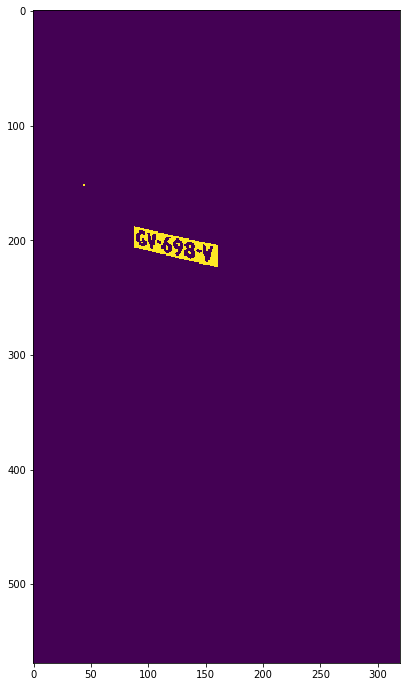

In [152]:
imgplot = plt.imshow(mask)
plt.show()

In [87]:
ret, thresh, thresh.sum(), mask.sum()

(127.0, array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 387600, 387600)

In [88]:
ret,thresh = cv2.threshold(mask,127,255,0)

In [89]:
len(cv2.findContours(mask, 1, 2))

3

In [98]:
cv2.findContours(mask, 1, 2)[2]

array([[[ 1, -1, -1, -1],
        [ 2,  0, -1, -1],
        [ 3,  1, -1, -1],
        [ 4,  2, -1, -1],
        [ 5,  3, -1, -1],
        [ 6,  4, -1, -1],
        [ 7,  5, -1, -1],
        [ 8,  6, -1, -1],
        [ 9,  7, -1, -1],
        [10,  8, -1, -1],
        [11,  9, -1, -1],
        [12, 10, -1, -1],
        [-1, 11, -1, -1]]], dtype=int32)

In [99]:
im, contours,hierarchy = cv2.findContours(mask, 1, 2)

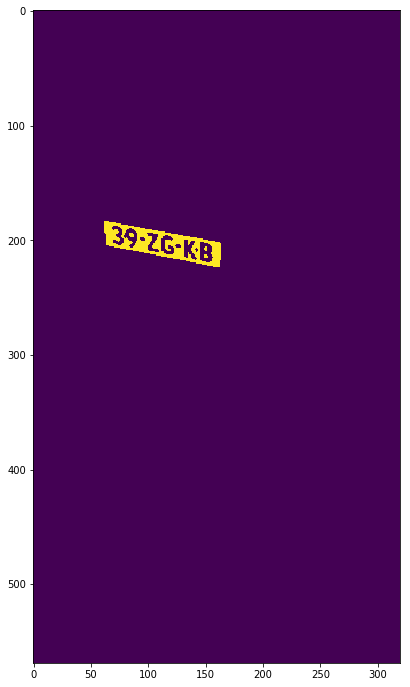

In [91]:
imgplot = plt.imshow(contours)
plt.show()

In [100]:
cnt = contours[0]

In [112]:
cv2.drawContours(mask, contours, -1, (0,255,0), 3)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [115]:
x,y,w,h = cv2.boundingRect(cnt)
img = cv2.rectangle(mask,(x,y),(x+w,y+h),(0,255,0),2)

In [114]:
cv2.rectangle(mask,(x,y),(x+w,y+h),(0,255,0),2)

35445

In [107]:
x, y, w, h

(149, 213, 4, 3)

In [116]:
img.sum(), mask.sum()

(35445, 35445)

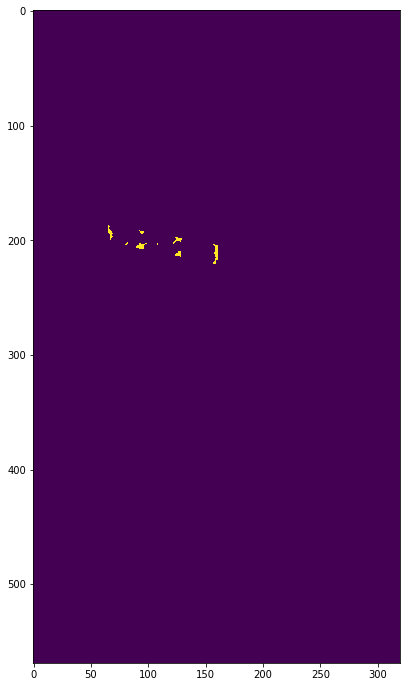

In [117]:
imgplot = plt.imshow(img)
plt.show()

In [65]:
x, y, w, h

(array([ 62,  63,  64, ..., 160, 161, 162]),
 array([184, 184, 184, ..., 223, 223, 223]),
 0,
 0)

In [38]:
contours[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

In [37]:
rect = cv2.minAreaRect(contours[0])

error: /feedstock_root/build_artefacts/opencv_1498146617840/work/opencv-3.2.0/modules/imgproc/src/convhull.cpp:136: error: (-215) total >= 0 && (depth == CV_32F || depth == CV_32S) in function convexHull


In [35]:
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
im = cv2.drawContours(mask,[box],0,(0,0,255),2)

error: /feedstock_root/build_artefacts/opencv_1498146617840/work/opencv-3.2.0/modules/imgproc/src/convhull.cpp:136: error: (-215) total >= 0 && (depth == CV_32F || depth == CV_32S) in function convexHull


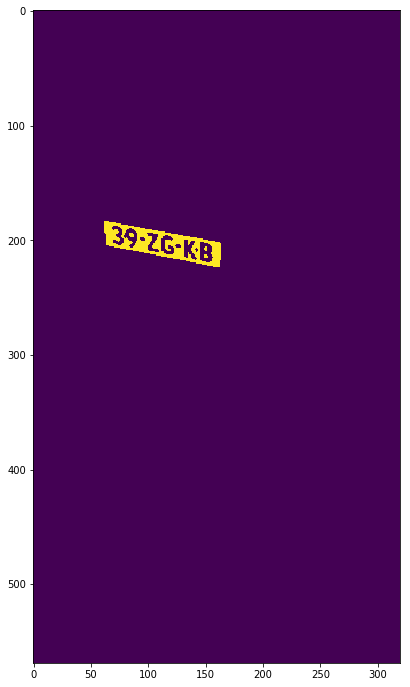

In [33]:
imgplot = plt.imshow(img)
plt.show()

In [42]:
x = np.nonzero(mask)[1]
y = np.nonzero(mask)[0]

In [43]:
np.argmax(x)

777

In [46]:
x[x==max(x)], y[x==max(x)]

(array([163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163,
        163, 163]),
 array([203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,
        216, 217]))

In [56]:
margin = 0

In [48]:
image.shape

(569, 320, 3)

In [49]:
np.min(y[x==max(x)])

203

In [50]:
piece_of_img = image[min(y): max(y) , min(x) : max(x), :]

In [57]:
piece_of_img = image[(min(y) - margin):(max(y) + margin), (min(x) - margin) : (max(x) + margin), :]

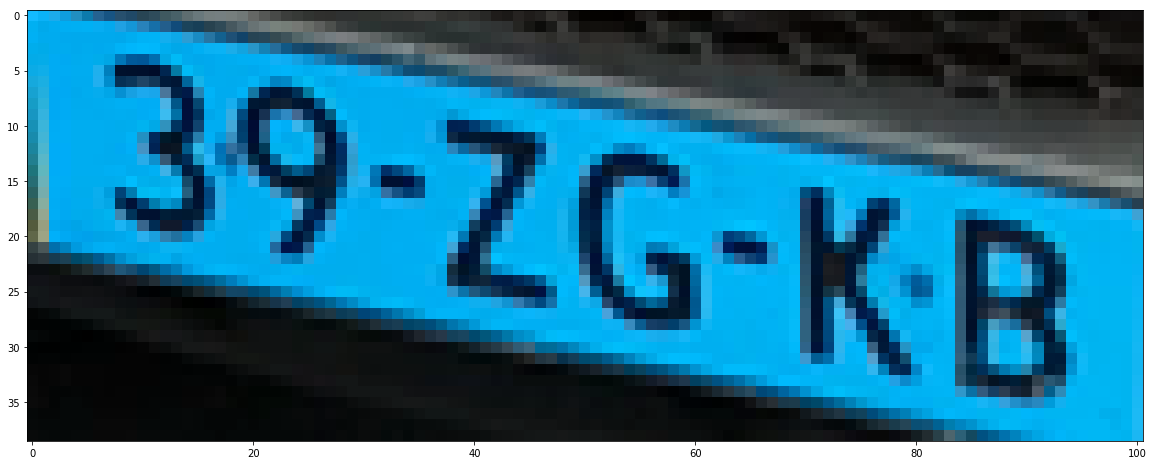

In [58]:
imgplot = plt.imshow(piece_of_img)
plt.show()

In [59]:
rows,cols,ch = piece_of_img.shape

In [62]:
top_left = [min(x), min(y[x==min(x)])]
top_right = [max(x), min(y[x==max(x)])]
bottom_left = [min(x), max(y[x==min(x)])]
bottom_right = [max(x), max(y[x==max(x)])]

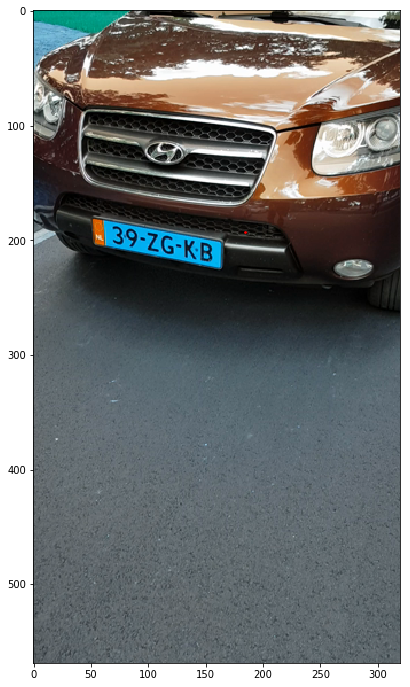

In [63]:
imgplot = plt.imshow(image)

plt.scatter(top_left[1],bottom_left[1] , c='red', s=3)
plt.show()


In [153]:
top_left, top_right, bottom_left, bottom_right

([165, 495], [442, 546], [165, 554], [442, 598])

In [160]:
rows,cols,ch = image.shape
height = bottom_left[1] - top_left[1]  
width = top_right[0] - top_left[0]

pts1 = np.float32([top_left, top_right, bottom_left, bottom_right])
pts2 = np.float32([[0,0],[width, 0],[0, height],[width,height]])

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(image,M,(width,height))


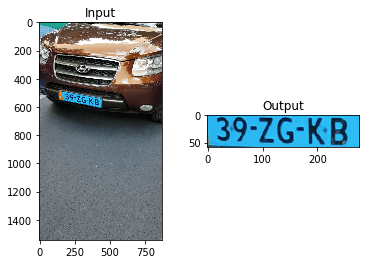

In [161]:
dst = cv2.warpPerspective(image,M,(width,height))

plt.subplot(121),plt.imshow(image),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

In [165]:
import re

In [174]:
wanted = 'GPS Coordinates                 : 50 deg 49\' 1.92" N, 5 deg 48\' 10.08" E\\n'

In [212]:
m = re.match(r'GPS Coordinates[^\d]*(\d{1,3})[^\d]*(\d\d)[^\d]*(\d.\d\d)[^\d]*(\d)[^\d]*(\d\d)[^\d]*(\d\d.\d\d)[^\d]*\\n', str(wanted))

In [213]:
m.groups()

('50', '49', '1.92', '5', '48', '10.08')

In [ ]:
\s*:\s*([\w\'" ,\\.\\]*)\\n'

# JPG to png

In [231]:
from PIL import Image

In [ ]:
im = Image.open("Ba_b_do8mag_c6_big.png")
rgb_im = im.convert('RGB')
rgb_im.save('colors.jpg')

In [232]:

im = Image.open('Movies2/20170806_130844.jpg')
im.save('Foto.png')